#Project name: AI model for Hyperspectral Image Analysis using ML and PCA

Contributor: Rajeev Singh Sisodiya

Project overview:

This project focuses on Hyperspectral Image Analysis using advanced data preprocessing, dimensionality reduction, and machine learning techniques. The primary goal is to classify different land cover types in a hyperspectral image using a Support Vector Machine (SVM) classifier.

Here’s an overview of the key steps:

Data Loading:

Hyperspectral image (HSI) data and ground truth labels are loaded from .mat files using the scipy.io.loadmat function. The data (X) consists of spectral information for each pixel, while y contains the corresponding class labels.

Data Reshaping:

The 3D hyperspectral image is transformed into a 2D array where each row corresponds to a pixel and each column represents a spectral band. This transformation facilitates easier manipulation and analysis.

Dimensionality Reduction (PCA):

Principal Component Analysis (PCA) is employed to reduce the high-dimensional spectral data to 3 principal components. This step is crucial for simplifying the dataset and improving the efficiency of subsequent machine learning algorithms.

Data Filtering:

Background pixels (class = 0) are excluded from the dataset, ensuring that only relevant classes are analyzed.

Data Visualization:

A bar plot is used to visualize the distribution of classes, providing insights into the frequency and representation of each class in the dataset.

Model Training:

The dataset is divided into training and testing sets using train_test_split. An SVM classifier with a radial basis function (RBF) kernel is trained on the training set to classify the pixels into different land cover classes.

Model Evaluation:

The trained SVM model is evaluated on the test set. Performance metrics such as accuracy, precision, recall, and F1-score are calculated and presented in a classification report. Additionally, a confusion matrix is generated to visualize the model's performance in distinguishing between different classes.

This comprehensive approach to hyperspectral image analysis combines powerful data processing techniques with machine learning to achieve accurate land cover classification.

#Download HSI Data

In [1]:
!wget http://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat http://www.ehu.eus/ccwintco/uploads/5/50/PaviaU_gt.mat

--2024-09-04 09:49:35--  http://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat [following]
--2024-09-04 09:49:35--  https://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34806917 (33M)
Saving to: ‘PaviaU.mat’

PaviaU.mat          100%[===================>]  33.19M  3.06MB/s    in 21s     

2024-09-04 09:49:57 (1.61 MB/s) - ‘PaviaU.mat’ saved [34806917/34806917]

URL transformed to HTTPS due to an HSTS policy
--2024-09-04 09:49:57--  https://www.ehu.eus/ccwintco/uploads/5/50/PaviaU_gt.mat
Reusing existing connection to www.ehu.eus:443.
HTTP request sent, awaiting response... No data received.
Retrying.


In [2]:
!ls

PaviaU_gt.mat  PaviaU.mat  sample_data


Read the Data

In [3]:
from scipy.io import loadmat

In [4]:
Data= loadmat('PaviaU.mat')
print(type(Data))
print("\n\n")
Data

<class 'dict'>





{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri May 20 18:21:46 2011',
 '__version__': '1.0',
 '__globals__': [],
 'paviaU': array([[[ 647,  499,  464, ..., 3221, 3238, 3250],
         [ 604,  546,  527, ..., 2442, 2464, 2528],
         [ 621,  746,  556, ..., 2308, 2345, 2361],
         ...,
         [ 524,  525,  598, ..., 2936, 2940, 2950],
         [ 528,  330,   70, ..., 2737, 2774, 2829],
         [ 711,  483,  423, ..., 2562, 2539, 2488]],
 
        [[ 705,  681,  668, ..., 2607, 2607, 2609],
         [ 891,  692,  453, ..., 1581, 1561, 1522],
         [ 547,  511,  604, ..., 1535, 1531, 1538],
         ...,
         [1149,  658,  434, ..., 3247, 3251, 3277],
         [ 917, 1004,  743, ..., 2828, 2806, 2808],
         [1037,  849,  547, ..., 2491, 2527, 2522]],
 
        [[1084,  875,  706, ..., 2108, 2167, 2183],
         [ 335,  517,  611, ..., 1105, 1109, 1095],
         [1042,  683,  318, ...,  806,  791,  814],
         ...,
         [ 799,  693,  

In [5]:
HSI = Data['paviaU']
print(HSI)

[[[ 647  499  464 ... 3221 3238 3250]
  [ 604  546  527 ... 2442 2464 2528]
  [ 621  746  556 ... 2308 2345 2361]
  ...
  [ 524  525  598 ... 2936 2940 2950]
  [ 528  330   70 ... 2737 2774 2829]
  [ 711  483  423 ... 2562 2539 2488]]

 [[ 705  681  668 ... 2607 2607 2609]
  [ 891  692  453 ... 1581 1561 1522]
  [ 547  511  604 ... 1535 1531 1538]
  ...
  [1149  658  434 ... 3247 3251 3277]
  [ 917 1004  743 ... 2828 2806 2808]
  [1037  849  547 ... 2491 2527 2522]]

 [[1084  875  706 ... 2108 2167 2183]
  [ 335  517  611 ... 1105 1109 1095]
  [1042  683  318 ...  806  791  814]
  ...
  [ 799  693  481 ... 2761 2791 2842]
  [ 226  350  613 ... 2885 2879 2859]
  [ 828  571  479 ... 2799 2809 2806]]

 ...

 [[ 733  617  708 ... 2190 2189 2176]
  [ 785  796  979 ... 1963 1983 1972]
  [ 826  828  928 ... 1905 1939 1965]
  ...
  [ 704  710  689 ... 2401 2385 2349]
  [ 376  305    0 ... 2449 2448 2429]
  [1146  919  707 ... 2504 2541 2523]]

 [[ 785  727  871 ... 2166 2179 2178]
  [ 856  894

In [6]:
Data_ = loadmat("PaviaU_gt.mat")
print(type(Data_))
print("\n\n")
Data_


<class 'dict'>





{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri May 20 18:25:52 2011',
 '__version__': '1.0',
 '__globals__': [],
 'paviaU_gt': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0]], dtype=uint8)}

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0]], dtype=uint8)
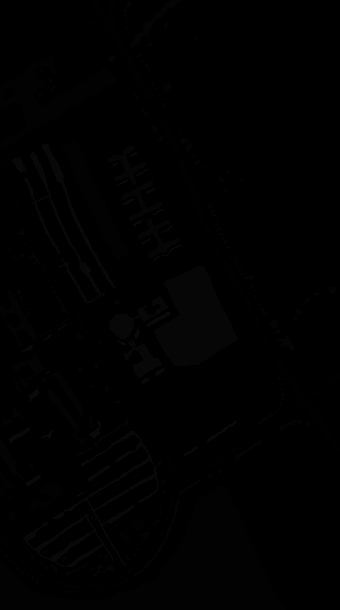

In [7]:
Data_["paviaU_gt"]

In [8]:
HSI.shape

(610, 340, 103)

In [9]:
Data_["paviaU_gt"].shape

(610, 340)

#Explore the Data

In [13]:
from scipy.io import loadmat

def read_HSI():
  X = loadmat('PaviaU.mat')['paviaU']
  y = loadmat('PaviaU_gt.mat')['paviaU_gt']
  print(f"X shape: {X.shape}\ny shape: {y.shape}")
  return X, y

X, y = read_HSI()

X shape: (610, 340, 103)
y shape: (610, 340)


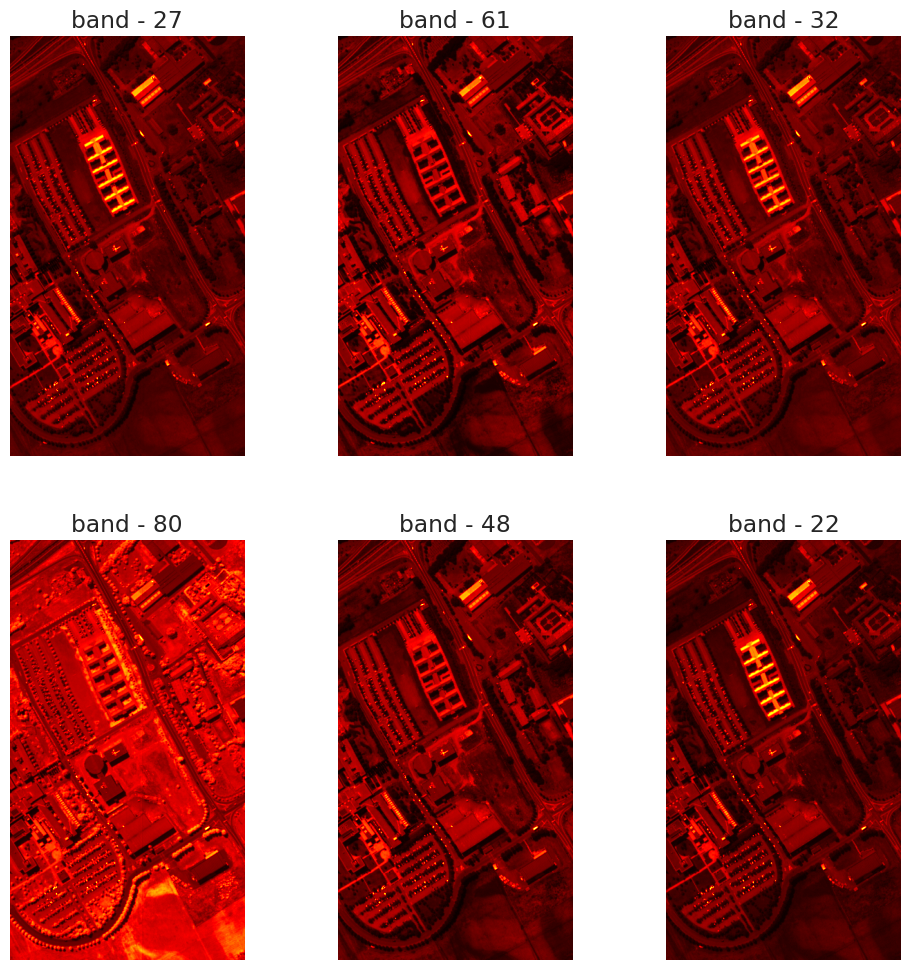

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.axes_style('whitegrid')
fig = plt.figure(figsize = (12, 12))

for i in range(1, 1+6):
    fig.add_subplot(2,3, i)
    # Check if X has at least 3 dimensions before accessing the third
    if len(X.shape) >= 3:
        q = np.random.randint(X.shape[2])    #Choose random band
        plt.imshow(X[:,:,q], cmap='hot')
        plt.axis('off')
        plt.title(f'band - {q}')
    else:
        print("X does not have enough dimensions to select a random band.")

#Create an AI model

X shape: (610, 340, 103)
y shape: (610, 340)
(207400, 103)


<ipython-input-11-f76206aa6986>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qq['label'] = qq['class'].apply(lambda x: class_labels[str(x)])


                      precision    recall  f1-score   support

             Asphalt       0.90      0.88      0.89      1326
             Meadows       0.81      0.99      0.89      3730
              Gravel       0.65      0.50      0.56       420
               Trees       0.94      0.82      0.88       613
Painted metal sheets       1.00      1.00      1.00       269
           Bare Soil       0.91      0.26      0.41      1006
             Bitumen       0.72      0.80      0.76       266
Self Blocking Bricks       0.78      0.86      0.81       737
             Shadows       1.00      0.99      1.00       189

            accuracy                           0.83      8556
           macro avg       0.86      0.79      0.80      8556
        weighted avg       0.84      0.83      0.81      8556



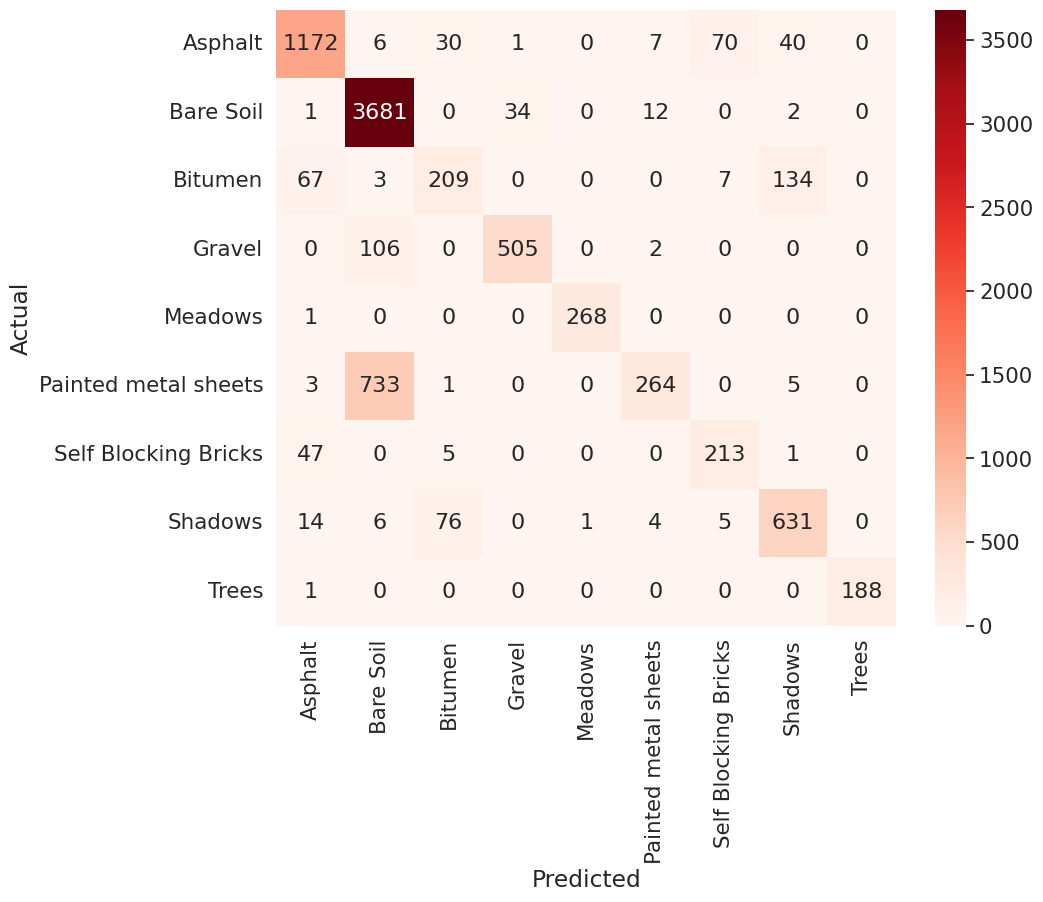

In [11]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Step 1: Load the hyperspectral image (HSI) data and ground truth
def read_HSI():
    X = loadmat('PaviaU.mat')['paviaU']
    y = loadmat('PaviaU_gt.mat')['paviaU_gt']
    print(f"X shape: {X.shape}\ny shape: {y.shape}")
    return X, y

X, y = read_HSI()

# Step 2: Reshape the 3D image to a 2D array for easier manipulation
def extract_pixels(X, y):
    q = X.reshape(-1, X.shape[2])  # Flatten the 3D image
    print(q.shape)
    df = pd.DataFrame(data=q)
    df = pd.concat([df, pd.DataFrame(data=y.ravel())], axis=1)
    df.columns = [f'band{i}' for i in range(1, 1 + X.shape[2])] + ['class']
    df.to_csv('Dataset.csv')
    return df

df = extract_pixels(X, y)

# Step 3: Apply PCA to reduce dimensions
pca = PCA(n_components=3)
dt = pca.fit_transform(df.iloc[:, :-1].values)
q = pd.concat([pd.DataFrame(data=dt), pd.DataFrame(data=y.ravel())], axis=1)
q.columns = [f'PC-{i}' for i in range(1, 4)] + ['class']
q.to_csv('paviaU_3.csv', index=False)

# Filter out background pixels (class = 0)
qq = q[q['class'] != 0]

# Step 4: Visualize class distribution
class_labels = {
    '1': 'Asphalt', '2': 'Meadows', '3': 'Gravel', '4': 'Trees',
    '5': 'Painted metal sheets', '6': 'Bare Soil', '7': 'Bitumen',
    '8': 'Self Blocking Bricks', '9': 'Shadows'
}

qq['label'] = qq['class'].apply(lambda x: class_labels[str(x)])
count = qq['class'].value_counts()

# Visualize the class distribution
bar_fig = px.bar(x=count.index, y=count, labels={'x': 'Class', 'y': 'Count'}, color=count.index)
bar_fig.show()

# Step 5: Train-Test Split
X = qq.iloc[:, :-1].values
y = qq.loc[:, 'class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11, stratify=y)

# Step 6: Train an SVM classifier
svm = SVC(C=100, kernel='rbf', cache_size=10*1024)
svm.fit(X_train, y_train)

# Step 7: Evaluate the model
ypred = svm.predict(X_test)
print(classification_report(y_test, ypred, target_names=list(class_labels.values())))

# Confusion Matrix
data = confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(data, columns=np.unique(list(class_labels.values())), index=np.unique(list(class_labels.values())))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize=(10,8))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Reds", annot=True, annot_kws={"size": 16}, fmt='d')
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()


#Conclusion
The AI model developed for hyperspectral image analysis shows promising results with an overall accuracy of 83%. Here's a breakdown of the model's performance:

High-Performing Classes:

Painted Metal Sheets and Shadows achieved perfect scores with a precision, recall, and F1-score of 1.00. This indicates the model's excellent ability to correctly identify these classes.
Asphalt and Meadows also performed well, with F1-scores of 0.89, showing reliable classification accuracy in these categories.

Challenging Classes:

Gravel and Bare Soil had lower F1-scores of 0.56 and 0.41, respectively. This suggests that the model struggles with distinguishing these classes, possibly due to spectral similarities with other classes or fewer training samples.
Bitumen and Self Blocking Bricks also had moderate performance, with F1-scores around 0.76 and 0.81, indicating room for improvement.

Macro vs. Weighted Averages:

The macro average F1-score of 0.80 reflects the model's balanced performance across all classes. However, the weighted average F1-score of 0.81 suggests that the model performs slightly better on more frequently occurring classes, which is typical in imbalanced datasets.

Recommendations:

Improve Class Balance: Consider gathering more data or applying techniques like oversampling/undersampling for underperforming classes such as Gravel and Bare Soil.

Feature Engineering:

Further feature engineering or advanced dimensionality reduction techniques could help improve classification for the challenging classes.

Model Tuning:
Experimenting with different machine learning models or tuning hyperparameters might enhance the model's overall performance.

The results indicate that while the model is robust for most classes, additional refinements could boost performance, particularly for the less distinct or underrepresented classes.



# Useful Data Insights

Class Distribution:

The bar plot provides a clear view of the class distribution, highlighting which classes are more prevalent and which are less represented. This insight is crucial for understanding potential biases in the data and preparing for balanced or imbalanced class scenarios.

Dimensionality Reduction Effectiveness:

By reducing the data to three principal components, PCA helps in visualizing complex hyperspectral data in a simpler form. The scatter plots can further reveal how well the different classes are separated in this reduced space.

Model Performance:

The confusion matrix and classification report give detailed insights into the model's accuracy and where it might be making errors. For example, if certain classes have lower precision or recall, it might indicate that those classes are harder to distinguish or are underrepresented.

Visualization Benefits:

Visualizing the confusion matrix helps in understanding the misclassification patterns, which can be useful for refining the model or exploring additional preprocessing techniques.
This combination of preprocessing, dimensionality reduction, and visualization forms a robust approach to analyzing and classifying hyperspectral images.